# Classify Protein Secondary Structure Using It's Amino Acid Sequence 

explaination of the project.....

### Imports

In [1]:
import pandas as pd
import mltoolkit
import sklearn

### Read in processed DataFrame

In [2]:
df = pd.read_pickle("./input_features.pkl")
df.head(3)

,structureChainId,sequence,secondary_structure,alpha,beta,coil,foldType,ngram,features
0,12AS.A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,CCCCHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSC...,0.345455,0.206061,0.448485,alpha+beta,"[MK, KT, TA, AY, YI, IA, AK, KQ, QR, RQ, QI, I...","[0.07492238, -0.29434553, 0.17545463, -0.15837..."
1,16VP.A,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,0.469945,0.046448,0.483607,alpha,"[SR, RM, MP, PS, SP, PP, PM, MP, PV, VP, PP, P...","[0.18599406, -0.9524737, 0.36988583, -0.513729..."
2,1A1X.A,GSAGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQ...,CCCCCCCCCCCSEEEEEETTEEEETTSCEEEEEEEECSSCEEEEEE...,0.037037,0.472222,0.490741,beta,"[GS, SA, AG, GE, ED, DV, VG, GA, AP, PP, PD, D...","[0.4235544, -0.5381708, 0.35269824, -0.6758413..."


### Select only alpha and beta foldType

In [3]:
df = df[(df.foldType == 'alpha') | (df.foldType == 'beta')]

print(f"Total number of data: {df.shape[0]}")
df.head(3)

Total number of data: 2586


,structureChainId,sequence,secondary_structure,alpha,beta,coil,foldType,ngram,features
1,16VP.A,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,0.469945,0.046448,0.483607,alpha,"[SR, RM, MP, PS, SP, PP, PM, MP, PV, VP, PP, P...","[0.18599406, -0.9524737, 0.36988583, -0.513729..."
2,1A1X.A,GSAGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQ...,CCCCCCCCCCCSEEEEEETTEEEETTSCEEEEEEEECSSCEEEEEE...,0.037037,0.472222,0.490741,beta,"[GS, SA, AG, GE, ED, DV, VG, GA, AP, PP, PD, D...","[0.4235544, -0.5381708, 0.35269824, -0.6758413..."
9,1A92.B,GREDILEQWVSGRKKLEELERDLRKLKKKIKKLEEDNPWLGNIKGI...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCTTHHHHHHH...,0.860000,0.000000,0.140000,alpha,"[GR, RE, ED, DI, IL, LE, EQ, QW, WV, VS, SG, G...","[0.16858329, -0.24097432, 1.1932192, 0.6472710..."


### Basic dataset information and setting

In [4]:
label = 'foldType'
testFraction = 0.1
seed = 123


vector = df.features.iloc[0]
featureCount = len(vector)
print(f"Feature count    : {featureCount}")

 
classCount = df.foldType.unique().size
print(f"Class count    : {classCount}\n")

  
print(f"Dataset size (unbalanced)    : {df.shape[0]}")
print(df.foldType.value_counts())


df = mltoolkit.downsample(df, 'foldType')
print(f"\nDataset size (balanced)  : {df.shape[0]}")
print(df.foldType.value_counts())

Feature count    : 50
Class count    : 2

Dataset size (unbalanced)    : 2586
alpha    1974
beta      612
Name: foldType, dtype: int64

Dataset size (balanced)  : 1224
beta     612
alpha    612
Name: foldType, dtype: int64


### Random Forest Classifier 


 Class	Train	Test

alpha	549	63

beta	552	60

Total time taken: 0.06161332130432129

Methods	RandomForestClassifier
AUC	0.96494708994709
F Score	0.9137931034482758
Accuracy	0.9186991869918699
Precision	0.9464285714285714
Recall	0.8833333333333333
False Positive Rate	0.05357142857142857
True Positive Rate	0.8955223880597015
	
Confusion Matrix
['alpha' 'beta']
[[60  3]
 [ 7 53]]


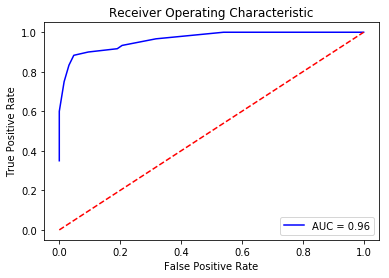

Sample predictions: 


,index,structureChainId,sequence,secondary_structure,alpha,beta,coil,foldType,ngram,features,indexedLabel,predictions
0,1838,2IC2.B,GSTYPPTPPNVTRLSDESVMLRWMVPRNDGLPIVIFKVQYRMVGKR...,CCCCCCCCCEEEEEETTEEEEEEEEECCSSCCEEEEEEEEEESSSS...,0.000000,0.478261,0.521739,beta,"[GS, ST, TY, YP, PP, PT, TP, PP, PN, NV, VT, T...","[0.16492362, 0.13480844, -0.0756082, 0.0755743...",1,beta
1,5232,4EHS.B,ERVSFQPFYPKTEKPNRPQRFAHVSSAPSLEFLEKLVIRYLLEDRS...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHCTH...,0.516129,0.000000,0.483871,alpha,"[ER, RV, VS, SF, FQ, QP, PF, FY, YP, PK, KT, T...","[0.19612004, -0.28791782, 0.912366, 0.05131140...",0,alpha
2,78,1CXZ.B,WSLLEQLGLAGADLAAPGVQQQLELERERLRREIRKELKLKEGAEN...,CCHHHHTTCTTSCTTSHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...,0.779070,0.000000,0.220930,alpha,"[WS, SL, LL, LE, EQ, QL, LG, GL, LA, AG, GA, A...","[0.7433647, -1.1345258, 1.150272, -0.2824925, ...",0,alpha
3,4980,4B1M.B,MGHHHHHHHHHHSSGHIEGRHMTTPFMSNMTGWTTVNGTWADTIEG...,CCCCCCCCCCCCCCCCCCCCCCCCSCCBSCCCCEESSSEEEEETTE...,0.000000,0.583784,0.416216,beta,"[MG, GH, HH, HH, HH, HH, HH, HH, HH, HH, HH, H...","[0.10572309, 0.50007063, -0.2771732, 0.1333669...",1,beta
4,8814,6EHD.A,AEILKSDAGTVDFYGQLRTELKFLEDKDPTIGSGSSRAGVDANYTV...,CEEEEESSEEEEEEEEEEEEEEEETTSCCEECCCCCEEEEEEEEEE...,0.015385,0.735385,0.249231,beta,"[AE, EI, IL, LK, KS, SD, DA, AG, GT, TV, VD, D...","[0.14332543, -0.09533907, -0.6719502, 0.068832...",1,beta
5,5076,4CAH.B,SMDAGHLSFVEEVFENQTRLPGGQWIYMSDNYTDVNGEKVLPKDDI...,CCCCCEEEEEEEEEEEEECCTTSCCEEEEEEEECTTSCBCCCGGGC...,0.026786,0.383929,0.589286,beta,"[SM, MD, DA, AG, GH, HL, LS, SF, FV, VE, EE, E...","[0.34164986, -0.24411045, 0.049055874, -0.4694...",1,alpha
6,8776,6CVZ.C,GSPSSQGQHKHKYHFQKTFTVSQAGNCRIMAYCDALSCLVISQPSP...,CCCCCCCCCCCCEEEEEEEESCTTCCCCCEEEETTTTEEEEEEECC...,0.000000,0.535613,0.464387,beta,"[GS, SP, PS, SS, SQ, QG, GQ, QH, HK, KH, HK, K...","[0.011651764, 0.06524144, 0.011915779, 0.00770...",1,beta
7,2398,2V33.B,EAPTIIDLTCTVATCTHSSDFGGVLTLTYKTNKNGDCSVHSHSNVA...,CCCCEEEEEEEEEEEBCEEEEEEEEEEEEEESSCEEEEEECCCSSE...,0.000000,0.670330,0.329670,beta,"[EA, AP, PT, TI, II, ID, DL, LT, TC, CT, TV, V...","[-0.038537085, 0.3994193, -0.6388634, 0.475499...",1,beta
8,2234,2QEU.C,GMDQESNATSQDILKQHAAHYESDMGGLPEALVQLAEYAPETFDAY...,CCCCCCCCHHHHHHHHHHHHHHHHHSSCCHHHHHHHHHCHHHHHHH...,0.751773,0.000000,0.248227,alpha,"[GM, MD, DQ, QE, ES, SN, NA, AT, TS, SQ, QD, D...","[-0.09608027, -0.6580636, 0.09710085, 0.064364...",0,alpha
9,5617,4IYK.A,GLTSCEIDNYEGPDASIHGSILDEQTGELVGSDMENGNAIKVREHG...,CCCCCCCCCCCCCCEEEEEEEEETTTCCBCCCCSSSSCCEEEEECC...,0.013333,0.511111,0.475556,beta,"[GL, LT, TS, SC, CE, EI, ID, DN, NY, YE, EG, G...","[-0.11305075, 0.33661106, -0.59928477, 0.25950...",1,beta


In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
mcc = mltoolkit.MultiClassClassifier(clf, 'foldType', testFraction=0.1)
matrics = mcc.fit(df)
for k,v in matrics.items(): print(f"{k}\t{v}")

# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)    

print("Sample predictions: ")
mcc.prediction.head(10)

### Logistic Regression Classifier


 Class	Train	Test

alpha	545	67

beta	556	56

Total time taken: 0.020797252655029297

Methods	LogisticRegression
AUC	0.9123134328358209
F Score	0.8275862068965518
Accuracy	0.8373983739837398
Precision	0.8
Recall	0.8571428571428571
False Positive Rate	0.2
True Positive Rate	0.873015873015873
	
Confusion Matrix
['alpha' 'beta']
[[55 12]
 [ 8 48]]


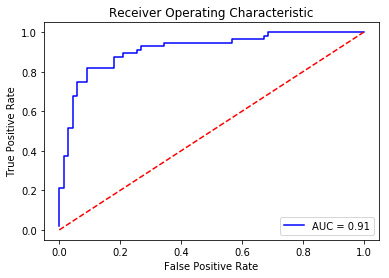

Sample predictions: 


,index,structureChainId,sequence,secondary_structure,alpha,beta,coil,foldType,ngram,features,indexedLabel,predictions
0,7662,5JJX.A,GGEYEWEYDEEEEKNQLEIERLEEQLSINVYDYNCHVDLIRLLRLE...,CCCCCCCCCCCHHHHHHHHHHHHHHHHHCTTCHHHHHHHHHHHHHT...,0.726115,0.000000,0.273885,alpha,"[GG, GE, EY, YE, EW, WE, EY, YD, DE, EE, EE, E...","[0.24615747, -0.5572082, 0.47359434, -0.217293...",0,alpha
1,5527,4HTP.B,MAASQTSQTVASHVPFADLCSTLERIQKSKGRAEKIRHFREFLDSW...,CCCCCCCCCSGGGSBHHHHHHHHHHHHHCCSHHHHHHHHHHHHHHH...,0.595833,0.008333,0.395833,alpha,"[MA, AA, AS, SQ, QT, TS, SQ, QT, TV, VA, AS, S...","[0.26895815, 0.034384143, 0.39927357, 0.154158...",0,alpha
2,1154,1XU1.A,KKHSVLHLVPVNITSKADSDVTEVMWQPVLRRGRGLEAQGDIVRVW...,CCCCEEEEEEEEEECCTTCSCEEEEEEEEEEESSSEEEETTEEEEC...,0.000000,0.630435,0.369565,beta,"[KK, KH, HS, SV, VL, LH, HL, LV, VP, PV, VN, N...","[-0.06591503, 0.23182657, -0.042762034, -0.089...",1,beta
3,2002,2O8S.B,MAPCLENVACVNLSAMPPAPPSPQPVSHKQAATLCRQGRTCALKSG...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.464396,0.000000,0.535604,alpha,"[MA, AP, PC, CL, LE, EN, NV, VA, AC, CV, VN, N...","[0.10731824, -0.270914, 0.04778185, 0.06062424...",0,alpha
4,6119,4P3F.A,MGHHHHHHGSKANKEFGDSLSLEILQIIKESQQQHGLRHGDFQRYR...,CCCCCCCCCCCCCCCCCCCBCCCHHHHHHHHHHHSSGGGTCHHHHH...,0.680556,0.009259,0.310185,alpha,"[MG, GH, HH, HH, HH, HH, HH, HG, GS, SK, KA, A...","[0.40976462, -0.39180073, 0.41162282, -0.20551...",0,alpha
5,3209,3E3V.A,MSLDENLIEEIKLADDISKGYNAALNYLSYQLRTRKEVEDKLRSLD...,CCCCCCCCCCCCCHHHHHHHHHHHHHHHHSSCCCHHHHHTTSGGGT...,0.644068,0.000000,0.355932,alpha,"[MS, SL, LD, DE, EN, NL, LI, IE, EE, EI, IK, K...","[0.49967137, 0.32409722, 0.39576033, 0.5725101...",0,alpha
6,1361,2BF6.A,VEGAVKTEPVDLFHPGFLNSSNYRIPALFKTKEGTLIASIDARRHG...,CTTCCBCCCEEEECTTGGGCSEEEEEEEEECTTSCEEEEEEEETTS...,0.024499,0.478842,0.496659,beta,"[VE, EG, GA, AV, VK, KT, TE, EP, PV, VD, DL, L...","[0.1181407, 0.40461183, -0.18332596, 0.3351892...",1,beta
7,6397,4TKC.A,MSYVHPYGSTLPENGVIGRGYALISDSGRVEFRVTDEGNIQLFLDD...,CCCBCSSTTEEETTEEEETTEEEECTTSSEEEEECTTSCEEEEETT...,0.025000,0.450000,0.525000,beta,"[MS, SY, YV, VH, HP, PY, YG, GS, ST, TL, LP, P...","[0.1552764, 0.24475309, -0.77225, 0.29010585, ...",1,beta
8,3380,3FRW.D,SNAMGKKIRTEEVDHLFEAILCLKNKEECYTFFEDVCTINELLSLS...,CCCCCCCCCCHHHHHHHHHHHTCCSHHHHHHHHHHHSCHHHHHHHH...,0.672897,0.000000,0.327103,alpha,"[SN, NA, AM, MG, GK, KK, KI, IR, RT, TE, EE, E...","[0.1960655, 0.042220194, -0.14128765, 0.398932...",0,alpha
9,556,1NC7.D,MGSSHHHHHHSSGRENLYFQGHMNGARKWFFPDGYIPNGKRGYLVS...,CCCCCCCCCCCCCCCCCCCCCCCCSEEEEEEEEECCCCCEETTEEC...,0.021739,0.543478,0.434783,beta,"[MG, GS, SS, SH, HH, HH, HH, HH, HH, HS, SS, S...","[-0.034593485, 0.66680443, 0.42075366, 0.29363...",1,beta


In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
mcc = mltoolkit.MultiClassClassifier(clf, 'foldType', testFraction=0.1)
matrics = mcc.fit(df)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)

### Simple Multilayer Perception Classifier


 Class	Train	Test

alpha	559	53

beta	542	70

Total time taken: 1.3029253482818604

Methods	MLPClassifier
AUC	0.9549865229110511
F Score	0.9275362318840579
Accuracy	0.9186991869918699
Precision	0.9411764705882353
Recall	0.9142857142857143
False Positive Rate	0.058823529411764705
True Positive Rate	0.8909090909090909
	
Confusion Matrix
['alpha' 'beta']
[[49  4]
 [ 6 64]]


/home/marshuang80/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


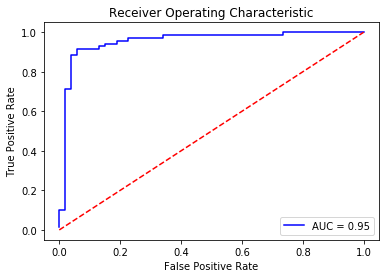

Sample predictions: 


,index,structureChainId,sequence,secondary_structure,alpha,beta,coil,foldType,ngram,features,indexedLabel,predictions
0,556,1NC7.D,MGSSHHHHHHSSGRENLYFQGHMNGARKWFFPDGYIPNGKRGYLVS...,CCCCCCCCCCCCCCCCCCCCCCCCSEEEEEEEEECCCCCEETTEEC...,0.021739,0.543478,0.434783,beta,"[MG, GS, SS, SH, HH, HH, HH, HH, HH, HS, SS, S...","[-0.034593485, 0.66680443, 0.42075366, 0.29363...",1,beta
1,5927,4MRT.C,PVTEAQYVAPTNAVESKLAEIWERVLGVSGIGILDNFFQIGGHALK...,CCCCCCCCCCCSHHHHHHHHHHHHHHTCCCCCTTCCTTTTTCCHHH...,0.488889,0.000000,0.511111,alpha,"[PV, VT, TE, EA, AQ, QY, YV, VA, AP, PT, TN, N...","[-0.0035484266, -0.26894292, -0.093853444, -0....",0,alpha
2,377,1JOV.A,MKTTLLKTLTPELHLVQHNDIPVLHLKHAVGTAKISLQGAQLISWK...,CCEEEEEEEETTEEEEEETTEEEEEEEETTEEEEEETBTTEEEEEE...,0.048148,0.537037,0.414815,beta,"[MK, KT, TT, TL, LL, LK, KT, TL, LT, TP, PE, E...","[-0.026225986, 0.15527603, 0.12254277, 0.18859...",1,alpha
3,7816,5LP9.A,MLADTTTVNGGTIHFKGEVVNAACAVDAGSVDQTVQLGQVRTASLK...,CCCCSSEEEEEEEEEECCCCCSSCEECTTTSEEEEECCEEEGGGSC...,0.018519,0.574074,0.407407,beta,"[ML, LA, AD, DT, TT, TT, TV, VN, NG, GG, GT, T...","[0.045781568, -0.30949357, -1.1309351, -0.0522...",1,beta
4,6149,4PEU.A,MGAHAVSIKKLILAASILTTLALTGCGGKGAVQPSGVSTGDVNAKI...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEEEEE...,0.000000,0.450479,0.549521,beta,"[MG, GA, AH, HA, AV, VS, SI, IK, KK, KL, LI, I...","[-0.2208023, 0.46709403, -0.4555793, 0.6658276...",1,beta
5,3338,3FHF.A,GNHHHHHMMLIKKIEELKNSEIKDIIDKRIQEFKSFKNKSNEEWFK...,CCTTHHHHHHHHHHHHHHTSTHHHHHHHHHHHHHGGGGSCHHHHHH...,0.705607,0.000000,0.294393,alpha,"[GN, NH, HH, HH, HH, HH, HM, MM, ML, LI, IK, K...","[0.033717047, 0.100702316, 0.7585825, 0.464802...",0,alpha
6,1927,2MCM.A,APGVTVTPATGLSNGQTVTVSATGLTPGTVYHVGQCAVVEPGVIGC...,CCEEEEESCSSBCTTEEEEEEEESCCTTCEEEEEEEEEEETTEEEE...,0.000000,0.598214,0.401786,beta,"[AP, PG, GV, VT, TV, VT, TP, PA, AT, TG, GL, L...","[-0.30238637, 0.16212445, -1.3038058, 0.101551...",1,beta
7,2023,2ODV.A,GSHMRANELQLRWQEYRELVLLLLQWMRHHTAAFEERRFPSSFEEI...,CCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCSSHHHH...,0.774468,0.000000,0.225532,alpha,"[GS, SH, HM, MR, RA, AN, NE, EL, LQ, QL, LR, R...","[0.3204856, -0.6854329, 0.5155255, -0.30672175...",0,alpha
8,4587,3U24.A,SNAQSQSNQATPSKVVSGEVNAASFAQFSNAFIDDLWQLSPTWALY...,CCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHCHHHHHH...,0.681818,0.022727,0.295455,alpha,"[SN, NA, AQ, QS, SQ, QS, SN, NQ, QA, AT, TP, P...","[0.11395606, -0.068659455, 0.05651917, 0.02079...",0,alpha
9,7906,5MK2.B,MEAVPRMPMIWLDLKEAGDFHFQPAVKKFVLKNYGENPEAYNEELK...,CTTCCCCCCCCCCCCCEEEECCHHHHHHHHHHHHCSCTTTTHHHHH...,0.648199,0.033241,0.318560,alpha,"[ME, EA, AV, VP, PR, RM, MP, PM, MI, IW, WL, L...","[0.075149454, -0.3328712, 0.15726371, -0.06858...",0,alpha


In [7]:
from sklearn.neural_network import MLPClassifier

layers = [featureCount, 32, 32, classCount]
clf = MLPClassifier(solver='sgd', \
                    alpha=1e-5, \
                    hidden_layer_sizes = (32, 32))
mcc = mltoolkit.MultiClassClassifier(clf, 'foldType', testFraction=0.1)

matrics = mcc.fit(df)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)